# 5 Pair correlation and nearest neighbors

First, let us display the pair correlation function $g(r)$ for each of the states.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

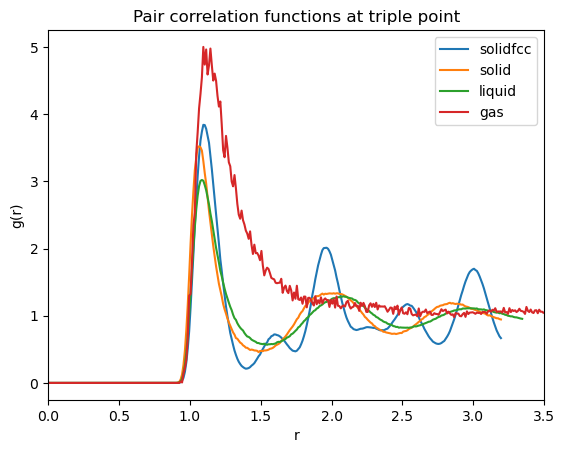

In [96]:
y = ['solidfcc','solid','liquid','gas']

for i in y:
    r,g = np.loadtxt(f'{i}/amclj.dat', unpack = True)
    plt.plot(r,g, label = i)

plt.title("Pair correlation functions at triple point")
plt.xlabel('r')
plt.ylabel('g(r)')
plt.legend()
plt.xlim([0,3.5])
plt.show()

        Coordination number for solidfcc:     0.3530
                                   R_min:     1.3950


           Coordination number for solid:     0.3330
                                   R_min:     1.4250


          Coordination number for liquid:     0.2772
                                   R_min:     1.5150


             Coordination number for gas:     0.0015
                                   R_min:     1.3550




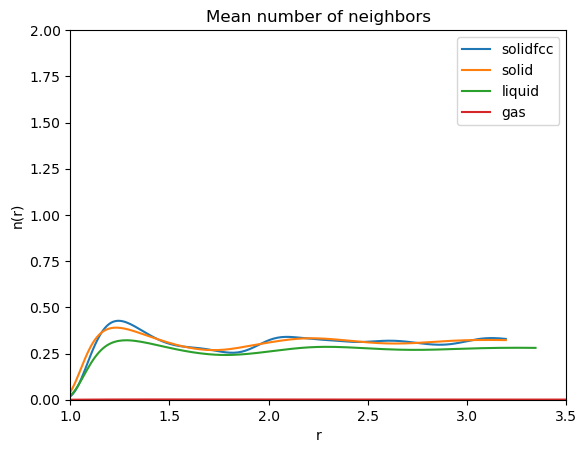

In [102]:
from scipy.signal import argrelmin

rho = [0.96,0.96,0.84,0.002]

for num, i in enumerate(y):
    r,g = np.loadtxt(f'{i}/amclj.dat', unpack = True)
    
    integrand = r**2 * g

    n = []
    coordination_number = []
    
    for rj in r:
        n.append(rho[num]*np.trapz(integrand[r<=rj], r[r<=rj])/(rj**3))

    index_min = argrelmin(g)[0][0]
    r_min = r[index_min]
    
    if i == 'gas':
        index_min = np.where((r>1.1) & ((g-1)<np.e**(-1) * (np.max(g)-1)))[0][0]
        r_min = r[index_min]

    print(f'{f"Coordination number for {i}":>40}: {n[index_min]:>10.4f}\n{f"R_min":>40}: {r_min:>10.4f}\n\n')

    plt.plot(r,n,label = i)

plt.title('Mean number of neighbors')
plt.xlabel("r")
plt.ylabel("n(r)")
plt.xlim([1,3.5])
plt.ylim([0,2])
plt.legend()
plt.show()
        